In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np

In [11]:
f, U_aus=np.loadtxt('Desktop/messdaten frequenzgang.txt', skiprows=1, usecols=(0,1),unpack=True)

In [15]:
D=1e-3
U_ein=0.2
g=U_aus/(U_ein*D)
print(len(U_aus)-21-49)

111


Text(0.5,1,'Frequenzgang')

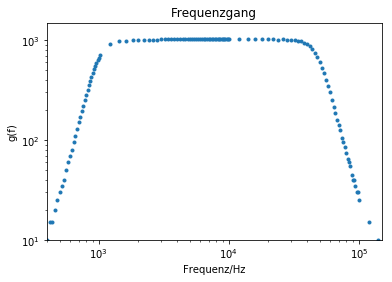

In [8]:
plt.loglog(f,g,linestyle='None',marker='.')
plt.axis([4e2,1.5e5,10,1.5e3])
plt.xlabel('Frequenz/Hz')
plt.ylabel('g(f)')
plt.title('Frequenzgang')

Text(0.5,1,'Frequenzgang')

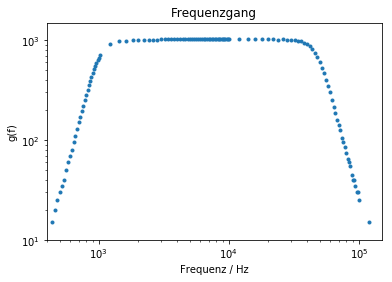

In [28]:
plt.loglog(f[17:138],g[17:138],linestyle='None', marker='.')
plt.axis([4e2,1.5e5,10,1.5e3])
plt.xlabel('Frequenz / Hz')
plt.ylabel('g(f)')
plt.title('Frequenzgang')

In [29]:
from scipy.optimize import curve_fit
def fit_func(f,V,W1,W2,n1,n2):
    return V/(np.sqrt(1+1/(f/W1)**(2*n1))*np.sqrt(1+(f/W2)**(2*n2)))
p0=[1000,400,12020,5,5]
popt, pcov = curve_fit(fit_func, f[17:138],g[17:138],p0)

C:\Users\jojos\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


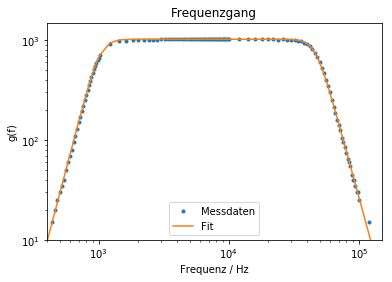

In [34]:
plt.loglog(f[17:138],g[17:138], linestyle= 'None', marker='.',label='Messdaten')
plt.loglog(f, fit_func(f, *popt), label='Fit')
plt.axis([4e2,1.5e5,10,1.5e3])
plt.xlabel('Frequenz / Hz')
plt.ylabel('g(f)')
plt.title('Frequenzgang')
plt.legend(loc='best')

In [33]:
import scipy.integrate as integrate 
def fit_func_square(f,V,W1,W2,n1,n2):
    return fit_func(f,V,W1,W2,n1,n2)**2
B=integrate.quad(fit_func_square, f[15], f[138], args=tuple(popt))
print('Das Integral beträgt: {value:.4e}'.format(value=B[0]))

Das Integral beträgt: 4.8580e+10
